In [41]:
import sys
sys.path.append('../scr')


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from ppgfilter import PPGFilter
# from SLBPPG import PPGFilter
# from SLBPPG import StressIndex

In [43]:
data = pd.read_csv('./test_data.csv')

ppg_fr = 256
sec_with = 10
num_sec = 10

tmp = data["afe_LED1ABSVAL"][sec_with * ppg_fr: (sec_with + num_sec) * ppg_fr]
ppg = tmp.values.flatten()

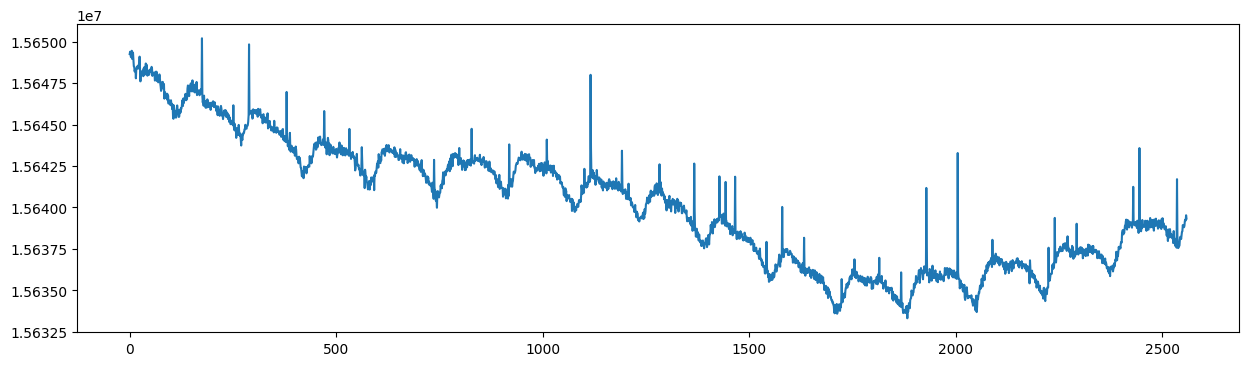

In [44]:
plt.figure(figsize=(15, 4))
plt.plot(ppg)
plt.show()

filter(self, ppg, ppg_fr, min_amplitude=3, min_len_interval=64, min_fr = 0.8, max_fr = 2.5, window_size=256)

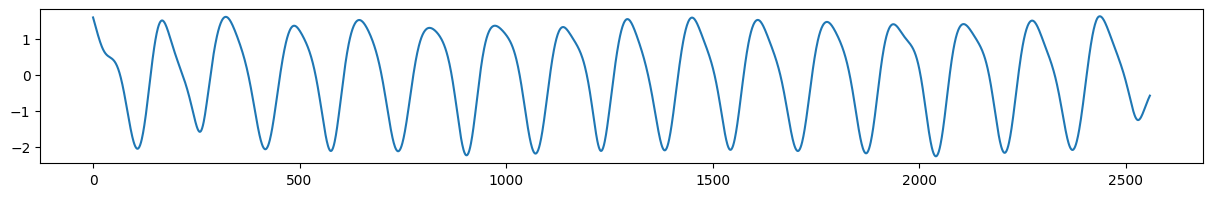

In [45]:
ppg_filter = PPGFilter()
filt_ppg, filt_ppg2 = ppg_filter.filter(ppg=ppg, ppg_fr=256, min_fr=0.5, max_fr=3)

plt.figure(figsize=(15, 2))
plt.plot(filt_ppg2)
plt.show()

In [46]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np

def get_rr_intervals(ppg_signal, sampling_rate):
    # Обработка сигнала и обнаружение пиков
    try:
        signals, info = nk.ppg_process(ppg_signal, sampling_rate=sampling_rate)
    except ValueError as e:
        print(f"Ошибка обработки сигнала: {e}")
        return None
    
    peaks = info["PPG_Peaks"]
    
    # Проверка наличия достаточного количества пиков
    if len(peaks) < 2:
        print("Недостаточно пиков для расчета RR-интервалов")
        return None
    
    # Расчет RR-интервалов в миллисекундах
    rr_intervals = np.diff(peaks) / sampling_rate * 1000
    
    # Визуализация сигнала с пиками
    plt.figure(figsize=(15, 2))
    plt.plot(ppg_signal, label='ФПГ-сигнал', color='#1f77b4')
    
    # Отметки пиков
    plt.scatter(peaks, 
               ppg_signal[peaks], 
               color='red', 
               label='Обнаруженные пики',
               zorder=2)
    
    # Настройки графика
    plt.title("ФПГ-сигнал с обнаруженными R-пиками", fontsize=14)
    plt.xlabel("Время (сэмплы)", fontsize=12)
    plt.ylabel("Амплитуда", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    
    # Визуализация RR-интервалов
    plt.figure(figsize=(15, 2))
    plt.stem(rr_intervals, linefmt='#2ca02c', markerfmt='go', basefmt=' ')
    plt.title("RR-интервалы", fontsize=14)
    plt.xlabel("Номер интервала", fontsize=12)
    plt.ylabel("Длительность (мс)", fontsize=12)
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

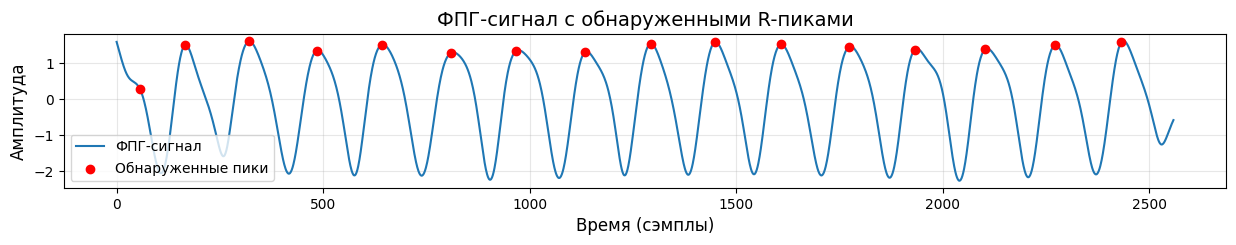

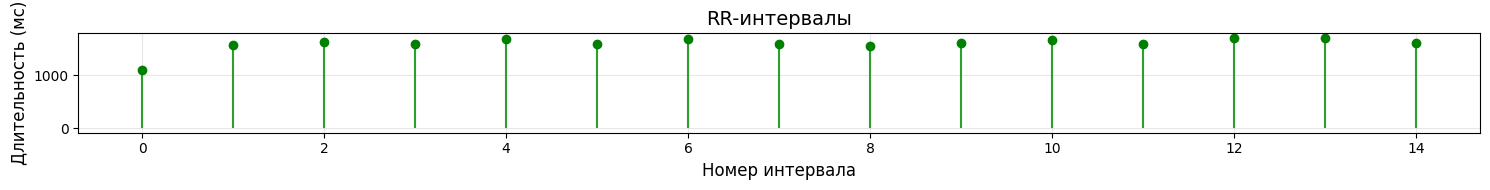

In [47]:
get_rr_intervals(filt_ppg2, sampling_rate=100)

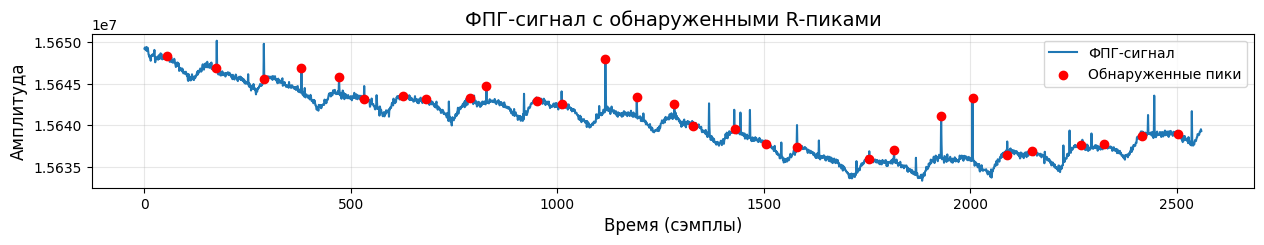

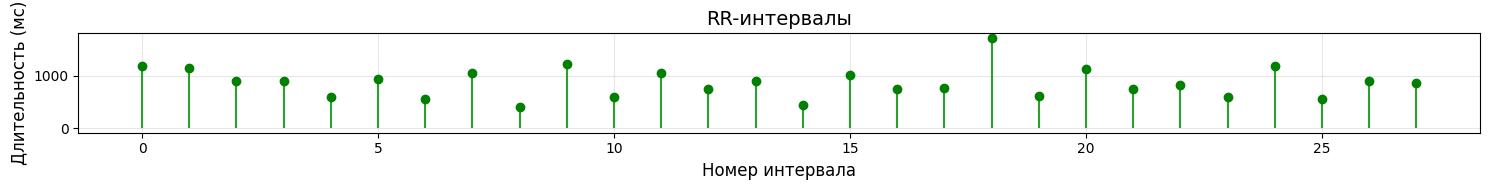

In [48]:
get_rr_intervals(ppg, sampling_rate=100)